# Venus analysis

### the main goal is to understand the structure of the venus including different types of materials and analysis of the potencial inner clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# to get the original dataset please follow this [link]( https://github.com/anthroposarch/vestonice_venus_research/blob/master/data/original_dataset.zip)

In [20]:

df = pd.read_csv('C:/Users/hamro/Desktop/vestonice_venus_research-master/data/original_dataset.csv',index_col=False)

C:\Users\hamro\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
df = df.copy()

### original data table

In [23]:
df.head()


,Unnamed: 0,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,EigenVal1,EigenVal2,...,BinMom2z (µm^2),BinMomxy (µm^2),BinMomxz (µm^2),BinMomyz (µm^2),VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3),index,Materials,Unnamed: 36
0,0,91.7529,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,0.000003,1.840680e-06,...,1.746770,-0.047707,0.361694,-0.420753,0.000245,0,91.7529,28662,NaN,28662
1,1,33.2852,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,0.000003,1.693810e-06,...,2.279480,-0.213815,-0.066307,-1.214960,0.000175,0,33.2852,27295,NaN,27295
2,2,26.8576,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,0.000002,7.116370e-07,...,0.805383,0.296185,0.016270,-0.383028,0.000195,0,26.8576,81533,NaN,81533
3,3,20.5755,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,0.000001,1.060810e-06,...,0.973514,0.504923,0.327703,-0.092007,0.000094,0,20.5755,33255,NaN,33255
4,4,17.9376,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,0.000001,5.236610e-07,...,0.480147,-0.009850,0.183060,0.102255,0.000071,0,17.9376,82721,NaN,82721


In [24]:
df.columns

Index(['Unnamed: 0', 'Volume3d (mm^3) ', 'BaryCenterX (mm) ',
       'BaryCenterY (mm) ', 'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation',
       'Flatness', 'EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X',
       'EigenVec1Y', 'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z',
       'EigenVec3X', 'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ',
       'ExtentMin2 (µm) ', 'ExtentMin3 (µm) ', 'ExtentMax1 (µm) ',
       'ExtentMax2 (µm) ', 'ExtentMax3 (µm) ', 'BinMom2x (µm^2) ',
       'BinMom2y (µm^2) ', 'BinMom2z (µm^2) ', 'BinMomxy (µm^2) ',
       'BinMomxz (µm^2) ', 'BinMomyz (µm^2) ', 'VoxelFaceArea',
       'BorderVoxelCount', 'GreyMass (µm^3) ', 'index', 'Materials',
       'Unnamed: 36'],
      dtype='object')

In [25]:
df = df.drop(df.columns[0], axis=1)

In [26]:
df

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,EigenVal1,EigenVal2,EigenVal3,...,BinMom2z (µm^2),BinMomxy (µm^2),BinMomxz (µm^2),BinMomyz (µm^2),VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3),index,Materials,Unnamed: 36
0,91.752900,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,2.516530e-06,1.840680e-06,1.142520e-06,...,1.746770,-0.047707,0.361694,-0.420753,2.447360e-04,0,91.752900,28662,NaN,28662
1,33.285200,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,2.988460e-06,1.693810e-06,1.600740e-07,...,2.279480,-0.213815,-0.066307,-1.214960,1.750780e-04,0,33.285200,27295,NaN,27295
2,26.857600,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,2.074190e-06,7.116370e-07,2.852490e-07,...,0.805383,0.296185,0.016270,-0.383028,1.949460e-04,0,26.857600,81533,NaN,81533
3,20.575500,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,1.440150e-06,1.060810e-06,2.237390e-07,...,0.973514,0.504923,0.327703,-0.092007,9.427890e-05,0,20.575500,33255,NaN,33255
4,17.937600,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,1.111430e-06,5.236610e-07,3.216550e-07,...,0.480147,-0.009850,0.183060,0.102255,7.130980e-05,0,17.937600,82721,NaN,82721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102510,0.000007,-1245.75,-1250.92,-1618.70,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,2.150700e-09,0,0.000007,102414,NaN,102414
102511,0.000007,-1245.36,-1250.98,-1618.53,1.000000,0.000000,-1.000000,3.585260e-10,0.000000e+00,0.000000e+00,...,0.000359,0.000000,0.000000,0.000000,2.150700e-09,0,0.000007,102434,NaN,102434
102512,0.000007,-1247.38,-1249.95,-1618.51,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,2.150700e-09,0,0.000007,102438,NaN,102438
102513,0.000007,-1244.28,-1245.09,-1618.51,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,2.150700e-09,0,0.000007,102442,NaN,102442


In [27]:
df.shape

(102515, 37)

In [7]:
df.columns

Index(['Unnamed: 0', 'Volume3d (mm^3) ', 'BaryCenterX (mm) ',
       'BaryCenterY (mm) ', 'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation',
       'Flatness', 'EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X',
       'EigenVec1Y', 'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z',
       'EigenVec3X', 'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ',
       'ExtentMin2 (µm) ', 'ExtentMin3 (µm) ', 'ExtentMax1 (µm) ',
       'ExtentMax2 (µm) ', 'ExtentMax3 (µm) ', 'BinMom2x (µm^2) ',
       'BinMom2y (µm^2) ', 'BinMom2z (µm^2) ', 'BinMomxy (µm^2) ',
       'BinMomxz (µm^2) ', 'BinMomyz (µm^2) ', 'VoxelFaceArea',
       'BorderVoxelCount', 'GreyMass (µm^3) ', 'index', 'Materials',
       'Unnamed: 36'],
      dtype='object')

In [28]:
## no zero values
df.isnull().sum()

Volume3d (mm^3)           0
BaryCenterX (mm)          0
BaryCenterY (mm)          0
BaryCenterZ (mm)          0
Anisotropy                0
Elongation                0
Flatness                  0
EigenVal1                 0
EigenVal2                 0
EigenVal3                 0
EigenVec1X                0
EigenVec1Y                0
EigenVec1Z                0
EigenVec2X                0
EigenVec2Y                0
EigenVec2Z                0
EigenVec3X                0
EigenVec3Y                0
EigenVec3Z                0
ExtentMin1 (µm)           0
ExtentMin2 (µm)           0
ExtentMin3 (µm)           0
ExtentMax1 (µm)           0
ExtentMax2 (µm)           0
ExtentMax3 (µm)           0
BinMom2x (µm^2)           0
BinMom2y (µm^2)           0
BinMom2z (µm^2)           0
BinMomxy (µm^2)           0
BinMomxz (µm^2)           0
BinMomyz (µm^2)           0
VoxelFaceArea             0
BorderVoxelCount          0
GreyMass (µm^3)           0
index                     0
Materials           

### dropping irrelevant columns for exploratory data analysis

In [29]:
df.columns

Index(['Volume3d (mm^3) ', 'BaryCenterX (mm) ', 'BaryCenterY (mm) ',
       'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X', 'EigenVec1Y',
       'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z', 'EigenVec3X',
       'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ', 'ExtentMin2 (µm) ',
       'ExtentMin3 (µm) ', 'ExtentMax1 (µm) ', 'ExtentMax2 (µm) ',
       'ExtentMax3 (µm) ', 'BinMom2x (µm^2) ', 'BinMom2y (µm^2) ',
       'BinMom2z (µm^2) ', 'BinMomxy (µm^2) ', 'BinMomxz (µm^2) ',
       'BinMomyz (µm^2) ', 'VoxelFaceArea', 'BorderVoxelCount',
       'GreyMass (µm^3) ', 'index', 'Materials', 'Unnamed: 36'],
      dtype='object')

In [30]:
df.drop(['EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X', 'EigenVec1Y',
       'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z', 'EigenVec3X',
       'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ', 'ExtentMin2 (µm) ', 'ExtentMin3 (µm) ',
       'ExtentMax1 (µm) ', 'ExtentMax2 (µm) ', 'ExtentMax3 (µm) ',
       'BinMom2x (µm^2) ', 'BinMom2y (µm^2) ', 'BinMom2z (µm^2) ',
       'BinMomxy (µm^2) ', 'BinMomxz (µm^2) ', 'BinMomyz (µm^2) ', 'index', 'Materials', 'Unnamed: 36'], axis=1, inplace=True)

In [31]:
df.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3)
0,91.7529,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,0.000245,0,91.7529
1,33.2852,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,0.000175,0,33.2852
2,26.8576,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,0.000195,0,26.8576
3,20.5755,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,0.000094,0,20.5755
4,17.9376,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,0.000071,0,17.9376


In [32]:
df.describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3)
count,102515.000000,102515.000000,102515.000000,102515.000000,102515.000000,102515.000000,102515.000000,1.025150e+05,102515.000000,102515.000000
mean,0.009713,-1246.522981,-1246.863327,-1672.536396,0.676258,0.438560,0.328198,1.468978e-07,0.001102,0.009713
std,0.361543,4.688294,7.830213,25.611063,0.416351,0.406608,0.508212,1.638454e-06,0.285857,0.361543
min,0.000007,-1262.260000,-1269.460000,-1731.770000,-1.000000,-1.000000,-1.000000,2.150700e-09,0.000000,0.000007
25%,0.000048,-1249.780000,-1252.495000,-1691.630000,0.611283,0.292913,0.179971,9.319510e-09,0.000000,0.000048
50%,0.000170,-1246.460000,-1246.840000,-1672.400000,0.772373,0.499862,0.447890,2.222410e-08,0.000000,0.000170
75%,0.000618,-1243.100000,-1241.280000,-1654.175000,0.904540,0.692323,0.655831,5.591810e-08,0.000000,0.000618
max,91.752900,-1233.450000,-1225.980000,-1617.670000,1.000000,0.999980,1.000000,2.447360e-04,90.000000,91.752900


<div style="background-color: yellow; text-align:center; padding:5px;">
<h2>exploratory data analysis</h2>
</div>  

# Number of particles

In [34]:
volume = df['Volume3d (mm^3) ']

In [35]:
volume.describe()

count    102515.000000
mean          0.009713
std           0.361543
min           0.000007
25%           0.000048
50%           0.000170
75%           0.000618
max          91.752900
Name: Volume3d (mm^3) , dtype: float64

### particles greater than or equal 1mm^3 and under 1mm^3

In [37]:
volume_under_1_mm = volume[volume < 1]
volume_above_1_mm = volume[volume >= 1]
print("the number of particles under 1 mm: ", volume_under_1_mm.count())
print("the number of particles above 1 mm: ", volume_above_1_mm.count())

the number of particles under 1 mm:  102382
the number of particles above 1 mm:  133


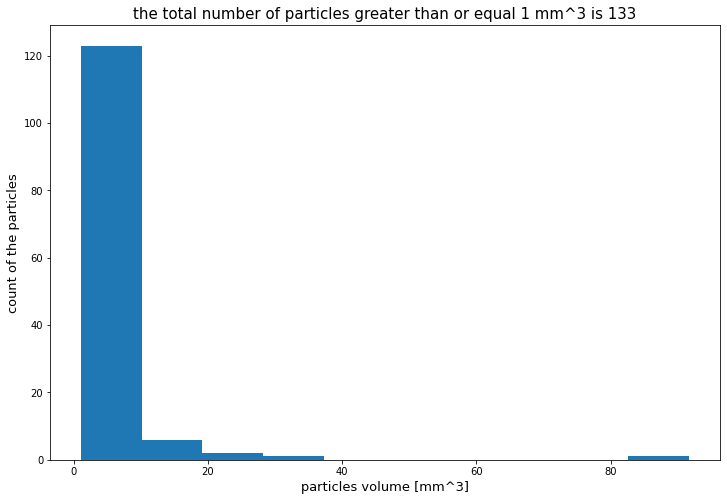

In [110]:
fig = plt.figure(figsize = (12,8))
plt.title(f"the total number of particles greater than or equal 1 mm^3 is {volume_above_1_mm.count()}", {'size':15})
plt.xlabel("particles volume [mm^3]", {'size':13})
plt.ylabel("count of the particles", {'size':13})
plt.hist(volume_above_1_mm)
plt.show()

In [111]:
between_1_and_20 = volume_above_1_mm[volume_above_1_mm <= 20]
over_20 = volume_above_1_mm[volume_above_1_mm > 20]

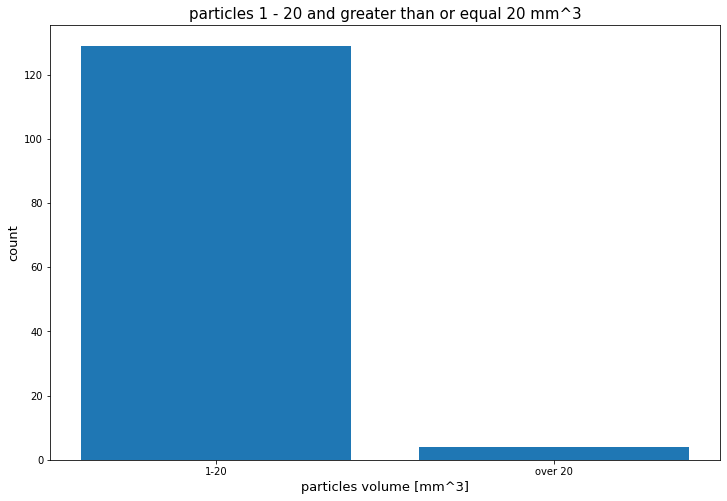

In [112]:
fig = plt.figure(figsize = (12,8))
plt.title(f"particles 1 - 20 and greater than or equal 20 mm^3", {'size':15})
plt.xlabel("particles volume [mm^3]", {'size':13})
plt.ylabel("count", {'size':13})
bars = [len(between_1_and_20), len(over_20)]
plt.bar(x = ["1-20","over 20"], height=bars)
plt.show()

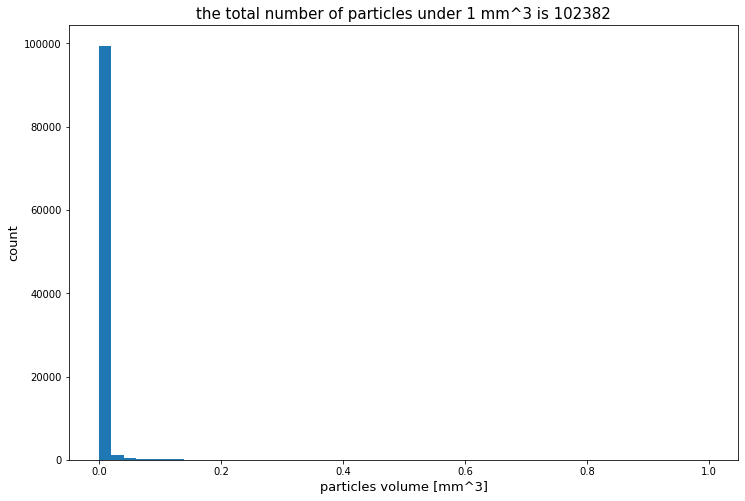

In [181]:
fig = plt.figure(figsize = (12,8))
plt.title(f"the total number of particles under 1 mm^3 is {volume_under_1_mm.count()}", {'size':15})
plt.xlabel("particles volume [mm^3]", {'size':13})
plt.ylabel("count", {'size':13})
plt.hist(volume_under_1_mm, bins=50)
plt.show()

In [55]:
volume_under_05_mm = df[df['Volume3d (mm^3) '] < 0.0002]
print(volume_under_05_mm.count())

Volume3d (mm^3)      55089
BaryCenterX (mm)     55089
BaryCenterY (mm)     55089
BaryCenterZ (mm)     55089
Anisotropy           55089
Elongation           55089
Flatness             55089
VoxelFaceArea        55089
BorderVoxelCount     55089
GreyMass (µm^3)      55089
dtype: int64


In [113]:
volume_under_0001_mm = df[df['Volume3d (mm^3) '] < 0.0001]
table_small_particles = pd.DataFrame(df[df['Volume3d (mm^3) '] < 0.0001]['Volume3d (mm^3) '].value_counts())

### Table of particles under 0.0001 mm^3

In [259]:
table_small_particles.index.name = "Volume [mm^3]"
table_small_particles.rename({'Volume3d (mm^3) ': 'Count'}, axis=1)

,Count
Volume [mm^3],
0.000007,6204
0.000014,5127
0.000027,4058
0.000020,3514
0.000034,2753
0.000041,2681
0.000054,2497
0.000048,2267
0.000061,1993


### these discrete values most likely show just error of measurement/noise, related to their very small measures 

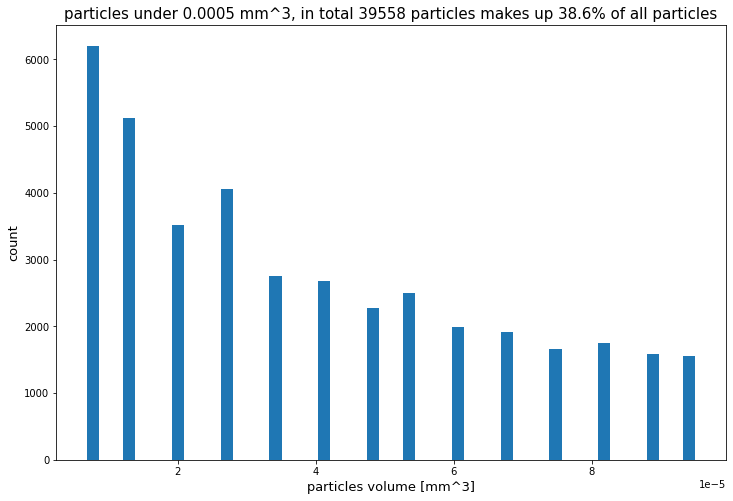

In [246]:
fig = plt.figure(figsize = (12,8))
plt.title(f"particles under 0.0005 mm^3, in total {len(volume_under_0001_mm)} particles makes up 38.6% of all particles", {'size':15})
plt.xlabel("particles volume [mm^3]", {'size':13})
plt.ylabel("count", {'size':13})
plt.hist(volume_under_001_mm['Volume3d (mm^3) '], bins=50)
plt.show()

In [52]:
volume_above_1_mm = volume[(volume >= 1)] 
volume_under_1_mm = volume[(volume < 1) & (volume >= 0.1)]
volume_under_01_mm = volume[(volume < 0.1) & (volume >= 0.01)]
volume_under_001_mm = volume[(volume < 0.01) & (volume >= 0.001)]
volume_under_0001_mm = volume[(volume < 0.001) & (volume >= 0.0001)]
volume_under_00001_mm = volume[(volume < 0.0001) & (volume >= 0.00001)]
volume_under_000001_mm = volume[volume < 0.00001]


print("the number of particles above 1: ", volume_above_1_mm.count())
print("the number of particles between  1 and 0.1 mm: ", volume_under_1_mm.count())
print("the number of particles between  0.1 and 0.01 mm ", volume_under_01_mm.count())
print("the number of particles between  0.01 and 0.001 mm ", volume_under_001_mm.count())
print("the number of particles between  0.001 and 0.0001 mm ", volume_under_0001_mm.count())
print("the number of particles under 0.0001 ", volume_under_00001_mm.count())

the number of particles above 1:  133
the number of particles between  1 and 0.1 mm:  820
the number of particles between  0.1 and 0.01 mm  3751
the number of particles between  0.01 and 0.001 mm  14559
the number of particles between  0.001 and 0.0001 mm  43694
the number of particles under 0.0001  33354


# Volume of particles

In [261]:
volume = df['Volume3d (mm^3) ']

In [264]:
volume_under_1_mm = volume[volume < 1]
volume_above_1_mm = volume[volume >= 1]


the number of particles above 1:  133
the number of particles between  1 and 0.1 mm:  102382


In [267]:
volumes = [volume_above_1_mm.sum(), volume_under_1_mm.sum(), volume_under_01_mm.sum(), volume_under_001_mm.sum(), volume_under_0001_mm.sum(), volume_under_00001_mm.sum(), volume_under_000001_mm.sum()]

In [281]:

volume_agg = pd.DataFrame(volumes, columns=['total volume'], index=['above 1','1-0.1', '0.1-0.01', '0.01-0.001', '0.001-0.0001', '0.0001-0.00001', 'below 0.00001'])

### Volume of particles greater than or equal 1 mm^3 account for a total of 59.12 % the total volume  

In [51]:
over_or_equal_1 = df[df['Volume3d (mm^3) '] >= 1]
under_1 =  df[df['Volume3d (mm^3) '] < 1]
#over_or_equal_1.sum()
under_1['Volume3d (mm^3) '].sum()
over_or_equal_1['Volume3d (mm^3) '].sum()
print(f"Volume of particles greater than or equal 1 mm^3 account for: {over_or_equal_1['Volume3d (mm^3) '].sum()/df['Volume3d (mm^3) '].sum()*100} % of a total volume")

Volume of particles greater than or equal 1 mm^3 account for: 59.116348067454595 % of a total volume


In [288]:
volume_agg.index.name = "volume [mm^3]"
volume_agg



,total volume
volume [mm^3],
above 1,588.657100
1-0.1,231.264241
0.1-0.01,114.987614
0.01-0.001,44.333230
0.001-0.0001,14.973358
0.0001-0.00001,1.502612
below 0.00001,0.042103


In [283]:
total_over_1 = volume_above_1_mm.sum()
total_under_1 = volume_under_1_mm.sum()
volume_total = pd.DataFrame([total_over_1, total_under_1], columns=['over1, under1'])
volume_total

,"over1, under1"
0,588.657100
1,231.264241


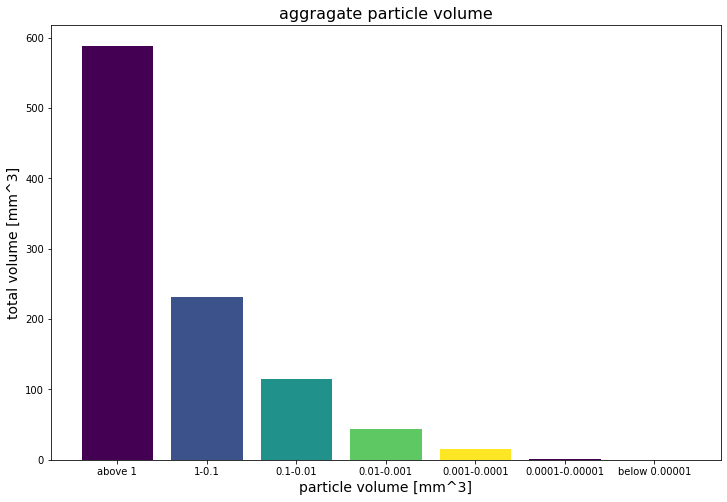

In [292]:
fig = plt.figure(figsize=(12,8))
x = np.array([1, 2, 3,4,5])
y = np.array([5, 6, 7,8,9])

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(x=volume_agg.index, height=volume_agg['total volume'], color=my_cmap(rescale(y)))
# Add Title and Labels
plt.title('aggragate particle volume', {'size': 16})
plt.xlabel('particle volume [mm^3]', {'size':14})
plt.ylabel('total volume [mm^3]', {'size':14})
plt.show()

# physical attributes: flatness, anisotropy, elongation

### we can see at first glance that there are most likely some errors related to extreme values (outliers)

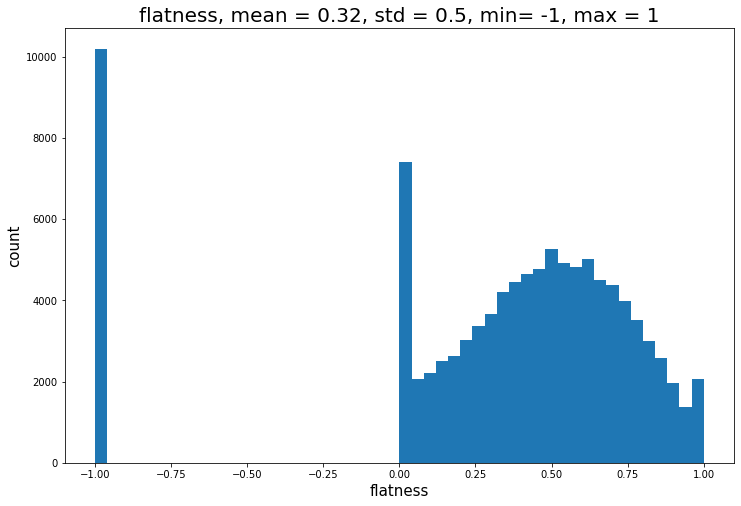

In [107]:
fig = plt.figure(figsize=(12,8))
plt.hist(df_analysis['Flatness'], bins=50)
plt.title("flatness, mean = 0.32, std = 0.5, min= -1, max = 1", fontdict = {'fontsize' : 20})
plt.xlabel("flatness", fontdict = {'fontsize' : 15})
plt.ylabel("count", fontdict = {'fontsize' : 15})
plt.show()

In [10]:
df_analysis.head()

,BaryCenterX (m),BaryCenterY (m),BaryCenterZ (m),Flatness,Anisotropy,Elongation
0,-1.24802,-1.25494,-1.73177,0.999919,0.000357,0.999723
1,-1.24356,-1.24089,-1.72867,0.510667,0.564459,0.852886
2,-1.24424,-1.24132,-1.72838,0.325492,0.710820,0.888441
3,-1.24135,-1.24193,-1.72832,0.462966,0.716858,0.611584
4,-1.24490,-1.24079,-1.72815,0.354414,0.707247,0.826021


In [11]:
df_analysis['Anisotropy'].describe()

count    102515.000000
mean          0.676258
std           0.416351
min          -1.000000
25%           0.611283
50%           0.772373
75%           0.904540
max           1.000000
Name: Anisotropy, dtype: float64

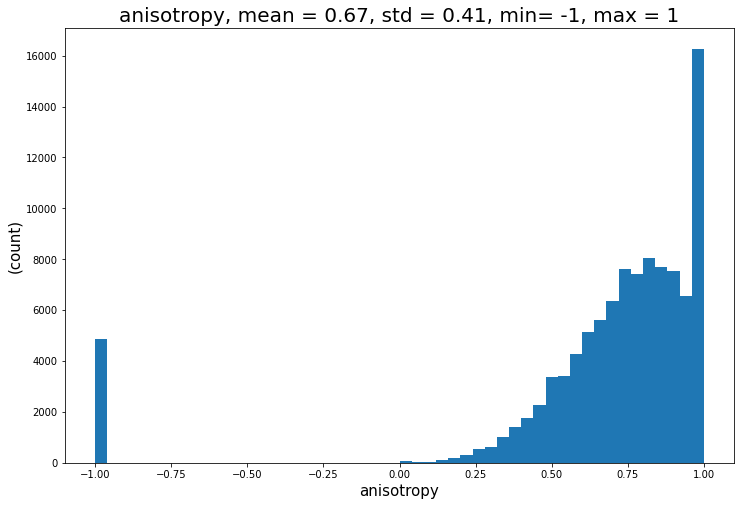

In [15]:
fig = plt.figure(figsize=(12,8))
plt.hist(df_analysis['Anisotropy'], bins=50)
plt.title("anisotropy, mean = 0.67, std = 0.41, min= -1, max = 1", fontdict = {'fontsize' : 20})
plt.xlabel("anisotropy", fontdict = {'fontsize' : 15})
plt.ylabel("(count)", fontdict = {'fontsize' : 15})
plt.show()

In [101]:
df_analysis['Elongation'].describe()

count    102515.000000
mean          0.438560
std           0.406608
min          -1.000000
25%           0.292913
50%           0.499862
75%           0.692323
max           0.999980
Name: Elongation, dtype: float64

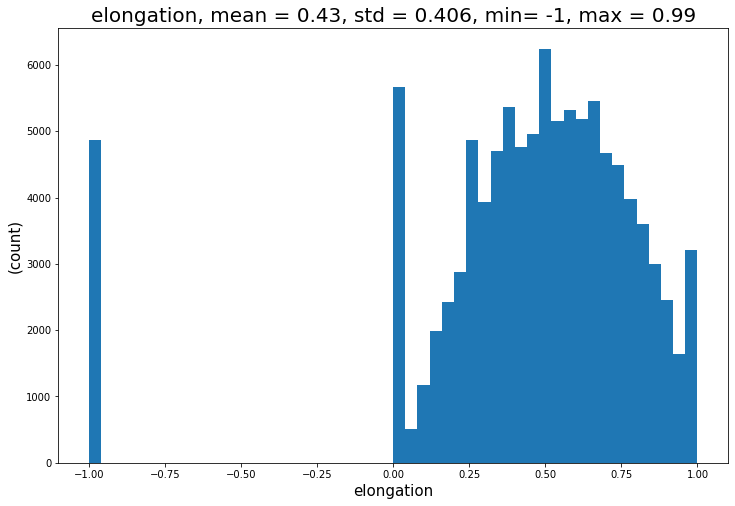

In [50]:
fig = plt.figure(figsize=(12,8))
plt.hist(df_analysis['Elongation'], bins=50)
plt.title("elongation, mean = 0.43, std = 0.406, min= -1, max = 0.99", fontdict = {'fontsize' : 20})
plt.xlabel("elongation", fontdict = {'fontsize' : 15})
plt.ylabel("(count)", fontdict = {'fontsize' : 15})
plt.show()

In [26]:
def flatness(flatness):
    if flatness <=0:
        return 0
    elif flatness >= 0 and flatness <= 0.25:
        return 1
    elif flatness > 0.25 and flatness <= 0.75:
        return 2
    else:
        return 3
    

In [27]:
df_analysis["flatness_groups"] = df_analysis['Flatness'].apply(flatness)

In [28]:
df_analysis[df_analysis['Flatness'] > 0.1].count()

BaryCenterX (m)     81799
BaryCenterY (m)     81799
BaryCenterZ (m)     81799
Flatness            81799
Anisotropy          81799
flatness_groups     81799
dtype: int64

In [29]:
x = df_analysis['BaryCenterX (m) ']
y = df_analysis['BaryCenterY (m) ']
z = df_analysis['BaryCenterZ (m) ']
flatness_groups = df_analysis['flatness_groups']

### evenly spaced flatness, for particles larger than 0.1 mm^3

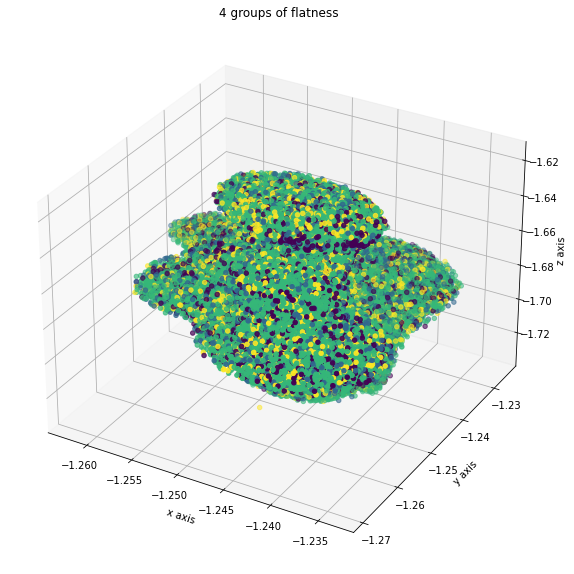

In [33]:

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(x,y,z,c=flatness_groups)

ax.set_xlabel("x axis")

ax.set_ylabel("y axis")

ax.set_zlabel("z axis")
plt.title("4 groups of flatness")


plt.show()
 


In [43]:
def flatness_2(flatness):
    if flatness <=0.05:
        return 0
    else:
        return 1
    

In [44]:
df_analysis["flatness_groups_2"] = df_analysis['Flatness'].apply(flatness_2)

In [85]:
x = df_analysis['BaryCenterX (m) ']
y = df_analysis['BaryCenterY (m) ']
z = df_analysis['BaryCenterZ (m) ']
flatness_groups_2 = df_analysis['flatness_groups_2']

### flatness for particles greater than or equal 0.05 mm^3

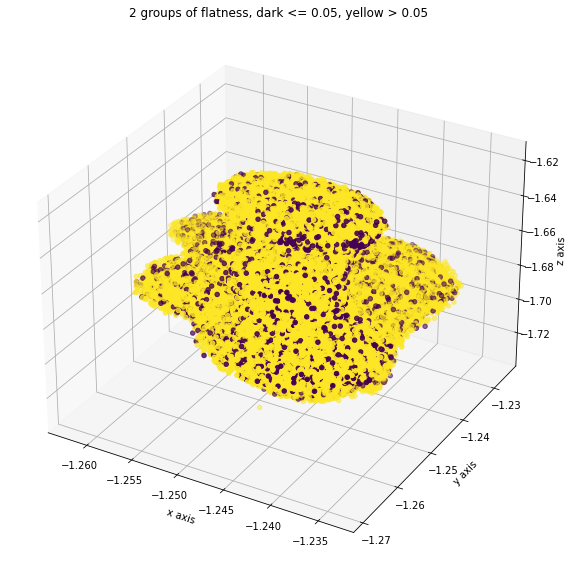

In [86]:

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')


ax.scatter(x,y,z,c=flatness_groups_2)

ax.set_xlabel("x axis")

ax.set_ylabel("y axis")

ax.set_zlabel("z axis")
plt.title("2 groups of flatness, dark <= 0.05, yellow > 0.05")


plt.show()

### sampling - for the reason of reducing the overlap side effect on the graphs

In [80]:
random_samples = df_analysis.sample(n=5000, random_state=1)

In [81]:
random_samples

,BaryCenterX (m),BaryCenterY (m),BaryCenterZ (m),Flatness,Anisotropy,flatness_groups,flatness_groups_2
26111,-1.25241,-1.25492,-1.69111,0.489688,0.789803,2,1
90076,-1.25030,-1.24571,-1.64072,-1.000000,1.000000,0,0
3714,-1.24814,-1.24373,-1.71761,0.569386,0.600962,2,1
59718,-1.24916,-1.25444,-1.66721,0.676114,0.574452,2,1
312,-1.24581,-1.24098,-1.72578,0.430742,0.624869,2,1
...,...,...,...,...,...,...,...
16508,-1.24828,-1.24361,-1.70134,0.035779,0.979513,1,0
21883,-1.24920,-1.23860,-1.69559,0.944376,0.674968,3,1
10059,-1.24942,-1.24155,-1.70889,0.654471,0.636053,2,1
7723,-1.24619,-1.24916,-1.71185,-1.000000,1.000000,0,0


In [82]:
x = random_samples['BaryCenterX (m) ']
y = random_samples['BaryCenterY (m) ']
z = random_samples['BaryCenterZ (m) ']
flatness_groups_2 = random_samples['flatness_groups_2']

### randomly sampled 5000 particles or reduce the overlap on the 3d plot

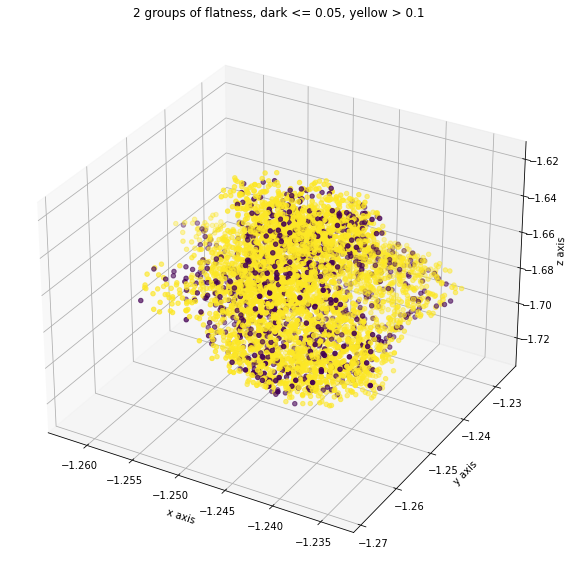

In [83]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=flatness_groups_2)
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")
plt.title("2 groups of flatness, dark <= 0.05, yellow > 0.1")


plt.show()